In [1]:
import os                               # 경로를 지정하거나 연산에 쓰기 위하여
import re                               # regular expression 주어진 규칙에 맞는 언어 연산
import pandas as pd                     # 데이터처리 및 데이터과학을 위한 라이브러리
import tensorflow as tf                 # 데이터 다운받는 용도로 필요
from tensorflow.keras import utils      # 데이터 다운받는 용도로 필요
from bs4 import BeautifulSoup           # 글에 존재할지 모르는 html태그를 삭제

# IMBD 데이터 다운로드
data_set = tf.keras.utils.get_file(
    fname = "imdb.tar.gz",              # 다운받은 파일의 이름
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract = True)
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
      data["review"].append(file.read())
  return pd.DataFrame.from_dict(data)
def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  return pd.concat([pos_df, neg_df])
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))
imdb_pd = pd.concat([train_df, test_df])
imdb_pd.head()

84125825/84125825 [==============================] - 12s 0us/step


,review,sentiment
0,A great addition to anyone's collection.<br />...,1
1,I must admit a slight disappointment with this...,1
2,Strange yet emotionally disturbing chiller abo...,1
3,Samuel Fuller is hardly one of America's great...,1
4,OK... this movie so far has been slated by cri...,1


In [9]:
from nltk.corpus import stopwords                             # 불용어(stopwords) 사전을 가져옴
import nltk
nltk.download('stopwords')                                    # 다운로드
set_stopwords = set(stopwords.words('english'))               # 영어로된 불용어 가져다 집합으로 구성

def preprocessing(review, remove_stopwords=True):
  review_text = BeautifulSoup(review, 'html5lib').get_text()  # html 태그 제거
  review_text = re.sub("[^a-zA-Z]", " ", review_text)
  # 위의 문장은 subtitution, 즉 대체하라는 의미이다.
  # a-z, A-Z를 제외하고 (제외한다는 표현은 꺽새 ^ 사용) 나머지들은 모두 두 번재 항목인 빈칸으로 대체
  # 어디에서? 세 번째 항목으로 주어진 review_text에서

  # 이제부터는 불용어를 제거하는 루틴을 돌릴거다.
  if remove_stopwords:                                        # 만약 이 함수를 쓸 때에 stopwords를 제거하라고 한다면
    words = review_text.split()                               # 현재 HEML제거하고, 알파벳으로만 구성된 리뷰 글을 쪼개서 리스트로 만듦
    # 위의 split의 결과는 만약에 입력 리뷰글이 "I am a boy"였다면 [I, am, a, boy]으로 변환. words라는 리스트
    # words 리스트의 하나하나를 보면서, 만약에 그 하나가 set_stopwords에 속하지 않으면
    # 불용어가 아니다.

    words = [w for w in words if not w in set_stopwords]      # 예를 들어 [I, am, a, boy]였고, 불용어가 am, a, 이었다면, 결과적으로 [I, boy]
    review_text = ' '.join(words)                             # 결과적으로 [I, boy]가 됨
  review_text = review_text.lower()                           # 대문자를 모두 소문자로 변경 (대소문자 비교는 감정 판단에 관련 없음)
  return review_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
reviews = list(imdb_pd['review'])
reviews = [preprocessing(r) for r in reviews] # 리뷰글에서 전처리 수행
print(reviews[0]) # 첫번째 문장 출력으로 검토
tokenized_reviews = [r.split() for r in reviews] # 단어별로 문장쪼개기
print(tokenized_reviews[0])
review_len_by_words = [len(t) for t in tokenized_reviews] # 리스트의 원소를 세므로 단어의 개수 출력
print(review_len_by_words[0])
#print(len(['I', 'am', 'a', 'boy'])) # 4
#print(len('Iamaboy')) # 7
review_len_by_alphabet = [len(s.replace(' ', '')) for s in reviews] # 리뷰글마다 빈칸을 없애주고. 그 상태에서 길이를 재면 알파벳 글자수 출력
print(review_len_by_alphabet[0])

<ipython-input-9-1311a30c007f>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'html5lib').get_text()  # html 태그 제거


a great addition anyone collection monkeys movie see every day it excellent actors go excellent story this normal role bruce willis holds role like holds john mcclane the virus kills everyone earth leaves hundred survivors story new one story takes fresh new direction a man bruce sent back time get information virus wiped man kind the actors awesome i must give mention brad pitt hilarious mental patient james cole bruce meets mental hospital the director amazing job bringing us disturbing picture future devastated man made virus the animals seen virus world made feel like run world humans driven underground facilities this movie excellent must see also must i much highly recommend
['a', 'great', 'addition', 'anyone', 'collection', 'monkeys', 'movie', 'see', 'every', 'day', 'it', 'excellent', 'actors', 'go', 'excellent', 'story', 'this', 'normal', 'role', 'bruce', 'willis', 'holds', 'role', 'like', 'holds', 'john', 'mcclane', 'the', 'virus', 'kills', 'everyone', 'earth', 'leaves', 'hund

Text(0, 0.5, 'Number of Reviews')

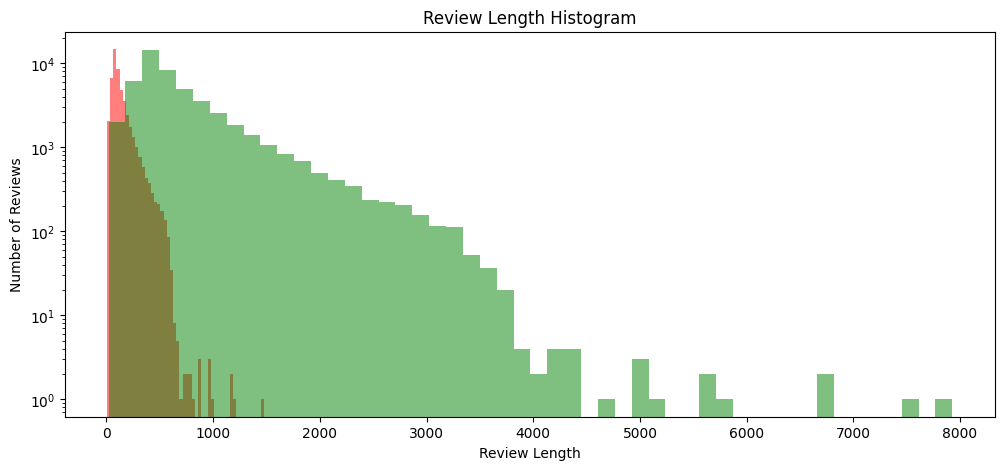

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
plt.hist(review_len_by_words, bins = 50, alpha = 0.5, color = 'r')
plt.hist(review_len_by_alphabet, bins = 50, alpha = 0.5, color = 'g')
plt.yscale('log', nonpositive='clip')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [12]:
import numpy as np
print("최대 단어수를 가지는 문장은 몇 개의 단어인가? ", np.max(review_len_by_words))
print("최소 단어수를 가지는 문장은 몇 개의 단어인가? ", np.min(review_len_by_words))
print("평균적으로 몇개의 단어를 가지는가? ", np.mean(review_len_by_words))
print("문장에 있는 단어들 수의 표준편차는? " , np.std(review_len_by_words))
print("문장의 단어수들의 중간 값은? ", np.median(review_len_by_words))
print('문장의 하위 10% 길이는? ', np.percentile(review_len_by_words, 10))

최대 단어수를 가지는 문장은 몇 개의 단어인가?  1481
최소 단어수를 가지는 문장은 몇 개의 단어인가?  4
평균적으로 몇개의 단어를 가지는가?  129.72192
문장에 있는 단어들 수의 표준편차는?  96.15245286269925
문장의 단어수들의 중간 값은?  97.0
문장의 하위 10% 길이는?  51.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5abffb5d80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5abffb62c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5abffb5ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5abffb6800>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5abffb6d40>],
 'means': [<matplotlib.lines.Line2D at 0x7f5abffb6aa0>]}

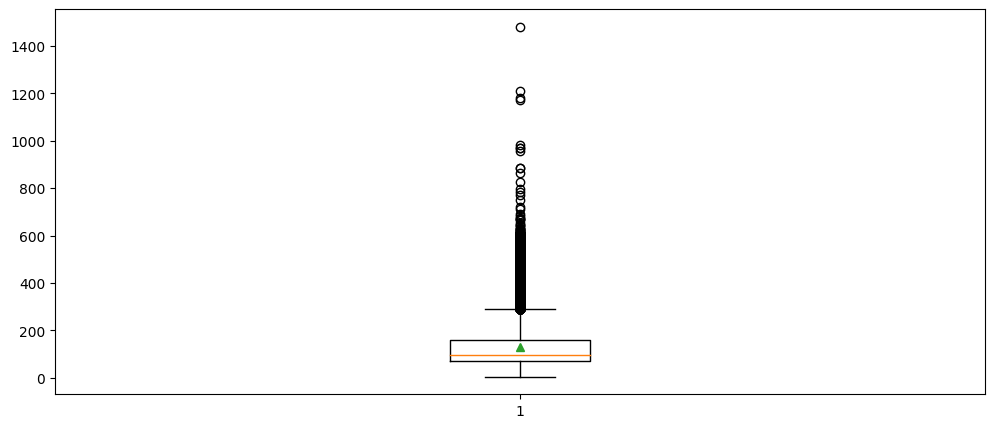

In [13]:
plt.figure(figsize = (12,5))
plt.boxplot([review_len_by_words], showmeans = True)
# 문장내 단어수에 대한

In [17]:
!pip install wordcloud

TypeError: Image data of dtype object cannot be converted to float

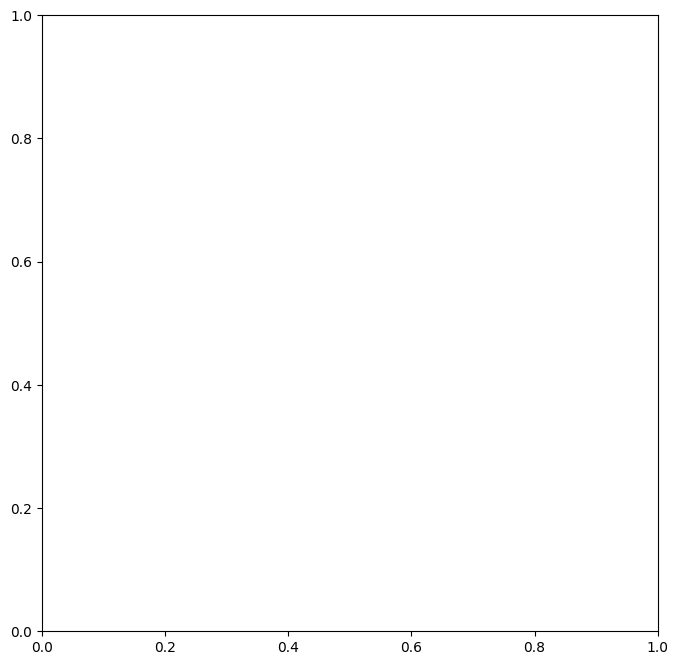

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
worldcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height =600).generate(' '.join(reviews))
plt.figure(figsize = (8,8))
plt.imshow(WordCloud)
plt.axis('off')
plt.show()